# Plot the HRET internal wave database over the southern ocean

Data

  - https://ingria.ceoas.oregonstate.edu/~zarone/downloads.html

Paper

 - E. D. Zaron. Baroclinic tidal sea level from exact-repeat mission altimetry. J. Phys. Oceanogr., 49(1):193--210, 2019. http://dx.doi.org/10.1175/JPO-D-18-0127.1

In [1]:
# !pip install --user cartopy==0.18.0 shapely==1.5.13
# !pip install --user --upgrade cartopy

In [2]:
import xarray as xr
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='medium'

In [4]:
# WA-IMOS location (August 2019)
sites = {
#'NIN100':{'y':-21.84986667,'x':113.9064667},
# 'NWSBAR':{'y':-20.76128333,'x':114.7586167},
# 'NWSROW':{'y':-17.75801667,'x':119.9061},
# 'NWSBRW':{'y':-14.23543333,'x':123.1623833},
# #'NWSLYN':{'y':-9.939416667,'x':130.3490833},
# 'PIL200':{'x': 115.9154, 'y':-19.435333}   ,
# 'KIM200':{'x':121.243217 , 'y':-15.534517} ,  
# 'KIM400':{'x': 121.114967, 'y':-15.22125}   ,
# 'ITFTIS':{'x': 127.5577, 'y':-9.819217}   ,
 'ITF':{'x': 127.3644, 'y':-9.7724},
 'SOTS':{'x': 141.65343, 'y':-46.82621},
 'EAC':{'x': 154.6493, 'y':-27.2083},

#'BB250':{'x':123.34613 , 'y':-13.75897}   ,

}


In [30]:
basedir = '../../../HRET'
ds = xr.open_dataset(r'{}/HRET_v8.1_compressed.nc'.format(basedir))

ds = ds.sel(longitude=slice(0,360),latitude=slice(-85,40))
ds

<xarray.Dataset>
Dimensions:    (longitude: 7200, latitude: 2501)
Coordinates:
  * longitude  (longitude) float64 0.0 0.05 0.1 0.15 ... 359.8 359.8 359.9 359.9
  * latitude   (latitude) float64 -85.0 -84.95 -84.9 -84.85 ... 39.9 39.95 40.0
Data variables:
    M2re       (latitude, longitude) float32 ...
    M2im       (latitude, longitude) float32 ...
    K1re       (latitude, longitude) float32 ...
    K1im       (latitude, longitude) float32 ...
    S2re       (latitude, longitude) float32 ...
    S2im       (latitude, longitude) float32 ...
    O1re       (latitude, longitude) float32 ...
    O1im       (latitude, longitude) float32 ...
    MA2re      (latitude, longitude) float32 ...
    MA2im      (latitude, longitude) float32 ...
    MB2re      (latitude, longitude) float32 ...
    MB2im      (latitude, longitude) float32 ...
Attributes:
    Conventions:              CF-1.7
    history:                  merged txa/j1a/j2a/j3a, txb/j1b/j2b, g1a, and e...
    resolution:               The spatial basis function coefficients are def...
    creator:                  Ed Zaron, ezaron@pdx.edu
    post-processing scripts:  baburu:NASA-Tides/Julia/; this file was written...
    scripts:                  namako:NASA-Tides/Julia/ and coeus:NASA-Tides/J...
    notes:                    This model is an update to the Carrere_HRET_tes...
    results:                  baburu:NASA-Tides/HRET_coeus_results/
    date:                     2018-05-23
    analysis method:          Empirical spatial basis functions are fit to al...
    compression:              compress_hret HRET_v8.1.nc HRET_v8.1_compressed.nc
    creation_time:            2019-03-08T10:45:32Z

In [31]:
# HRET
tidecon='M_2'
amp = np.abs(ds.M2re+1j*ds.M2im)
idx = amp==0
lons, lats, data = ds.longitude.values, ds.latitude.values, amp*100


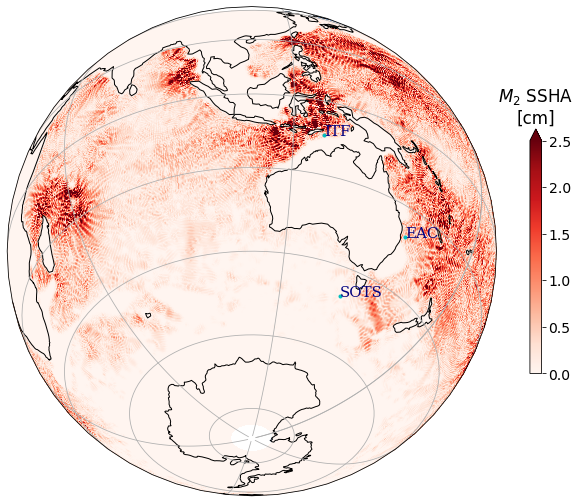

In [32]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 1, 1, 
            projection=ccrs.Orthographic(central_longitude=110, central_latitude=-40.))


# ax1.contourf(lons, lats, data, np.arange(0.,2.5,0.25) , extend='max',
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')
C = ax1.pcolormesh(lons, lats, data, vmin=0, vmax=2.5,
            transform=ccrs.PlateCarree(),
            cmap='Reds')

# ax1.pcolormesh(lons2, lats2, data2, vmin=0, vmax=2.5,
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')

# ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
# ax1.set_global()
ax1.gridlines(linestyles=':')


font = {'family': 'serif',
        'color':  'navy',
        'weight': 'normal',
        'size': 15,
        }

for ss in sites.keys():
    plt.plot(sites[ss]['x'],sites[ss]['y'],'c.', transform=ccrs.PlateCarree())

    plt.text(sites[ss]['x'],sites[ss]['y'],ss, transform=ccrs.PlateCarree(), fontdict=font)

cax=plt.colorbar(C, extend='max', shrink=0.5)
cax.ax.set_title('$M_2$ SSHA\n[cm]')

plt.savefig('../FIGURES/HRET_M2_SouthernOcean_Eastern.png', dpi=150)

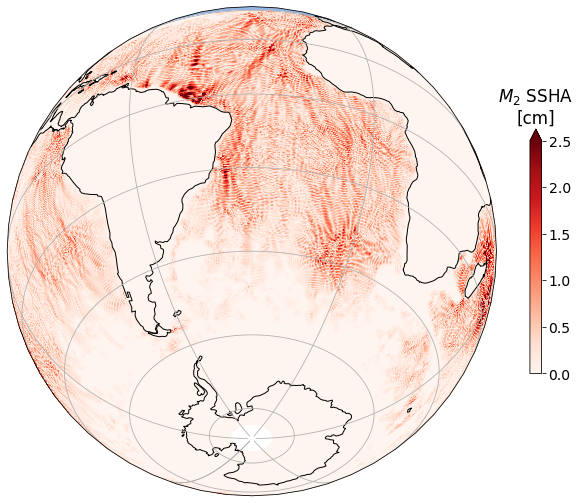

In [33]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 1, 1, 
            projection=ccrs.Orthographic(central_longitude=330, central_latitude=-40.))


# ax1.contourf(lons, lats, data, np.arange(0.,2.5,0.25) , extend='max',
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')
C = ax1.pcolormesh(lons, lats, data, vmin=0, vmax=2.5,
            transform=ccrs.PlateCarree(),
            cmap='Reds')

# ax1.pcolormesh(lons2, lats2, data2, vmin=0, vmax=2.5,
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')

# ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
# ax1.set_global()
ax1.gridlines(linestyles=':')


font = {'family': 'serif',
        'color':  'navy',
        'weight': 'normal',
        'size': 15,
        }

# for ss in sites.keys():
#     plt.plot(sites[ss]['x'],sites[ss]['y'],'c.', transform=ccrs.PlateCarree())

#     plt.text(sites[ss]['x'],sites[ss]['y'],ss, transform=ccrs.PlateCarree(), fontdict=font)

cax=plt.colorbar(C, extend='max', shrink=0.5)
cax.ax.set_title('$M_2$ SSHA\n[cm]')

plt.savefig('../FIGURES/HRET_M2_SouthernOcean_Western.png', dpi=150)